In [45]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.fft import fft
import seaborn as sns

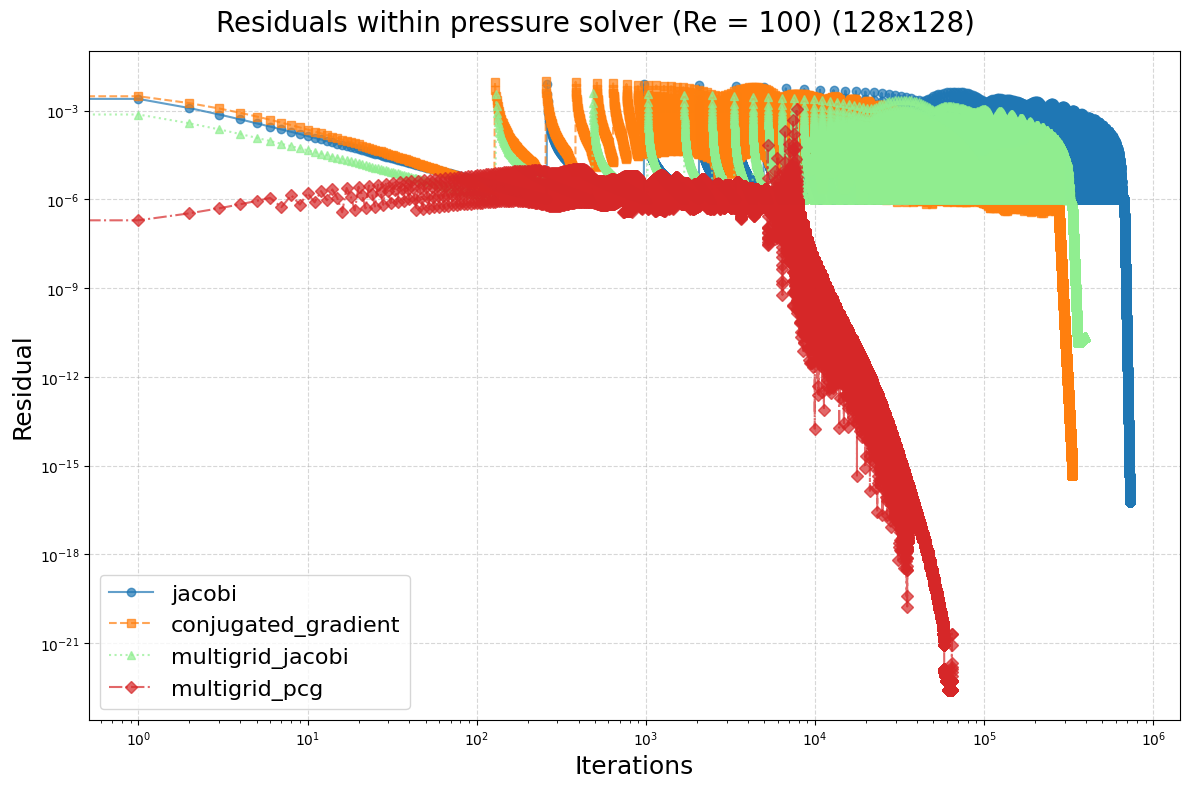

In [46]:
import numpy as np
import matplotlib.pyplot as plt

benchmarks = [
    (
        '128x128', {
            'lid_driven_cavity_2d': [
                'jacobi',
                'conjugated_gradient',
                'multigrid_jacobi',
                'multigrid_pcg'
            ]
        }
    ),
]

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D']

# Create a cycle of distinct colors
colors = ['#1f77b4', '#ff7f0e', '#90ee90', '#d62728']

residuals = ['residuals_with_pressure_solver']

for residual in residuals:
    for RE in [100]:
        fig = plt.figure(figsize=(12, 8))

        if residual == 'residuals_without_pressure_solver':
            fig.suptitle(f'Residuals after pressure solver (Re = {RE})', fontsize=20)
        elif residual == 'residuals_with_pressure_solver':
            fig.suptitle(f'Residuals within pressure solver (Re = {RE}) (128x128)', fontsize=20)

        for i, (resolution, solvers_dict) in enumerate(benchmarks):
            for problem_name, solvers in solvers_dict.items():
                for j, solver in enumerate(solvers):
                    data = np.loadtxt(f"../{RE}/{resolution}/{problem_name}/{solver}/{residual}.dat", ndmin=1)

                    non_zero_indexes = np.nonzero(data)
                    selected_data = data[non_zero_indexes]

                    plt.plot(
                        np.arange(len(selected_data)),
                        selected_data,
                        label=f'{solver}',
                        linestyle=line_styles[j % len(line_styles)],
                        color=colors[j % len(colors)],
                        marker=markers[j % len(markers)],
                        markersize=6,
                        alpha=0.7,
                    )

                # set x label
                plt.xlabel('Iterations', fontsize=18)
                # set grid
                plt.grid(True, linestyle='--', alpha=0.5)
                # set y label
                plt.ylabel('Residual', fontsize=18)
                #y log scale
                plt.yscale('log')
                plt.xscale('log')
                # set legend
                plt.legend(loc='best', fontsize=16)
                plt.tight_layout()
                plt.show()


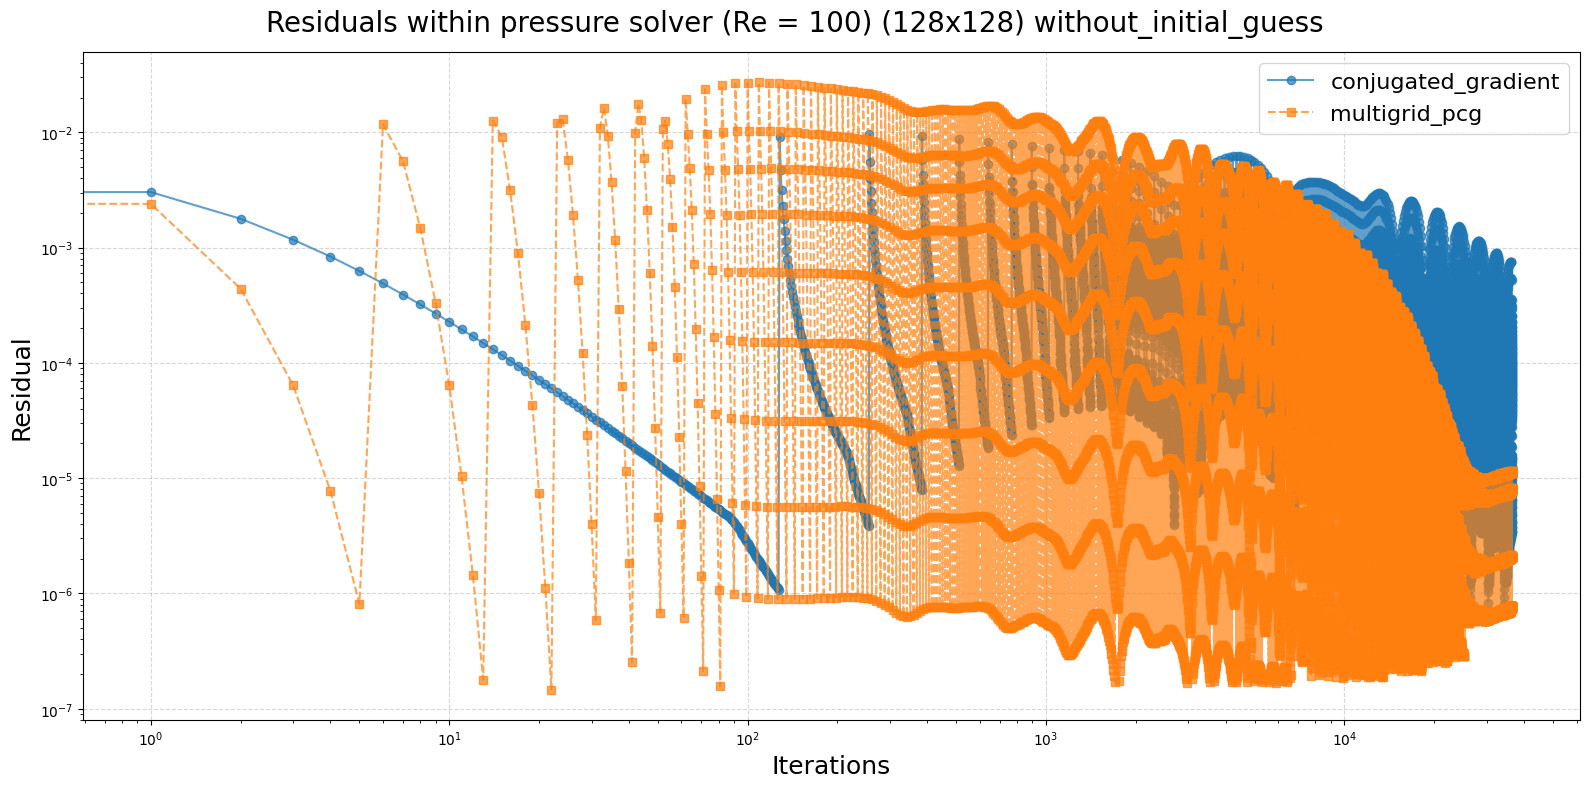

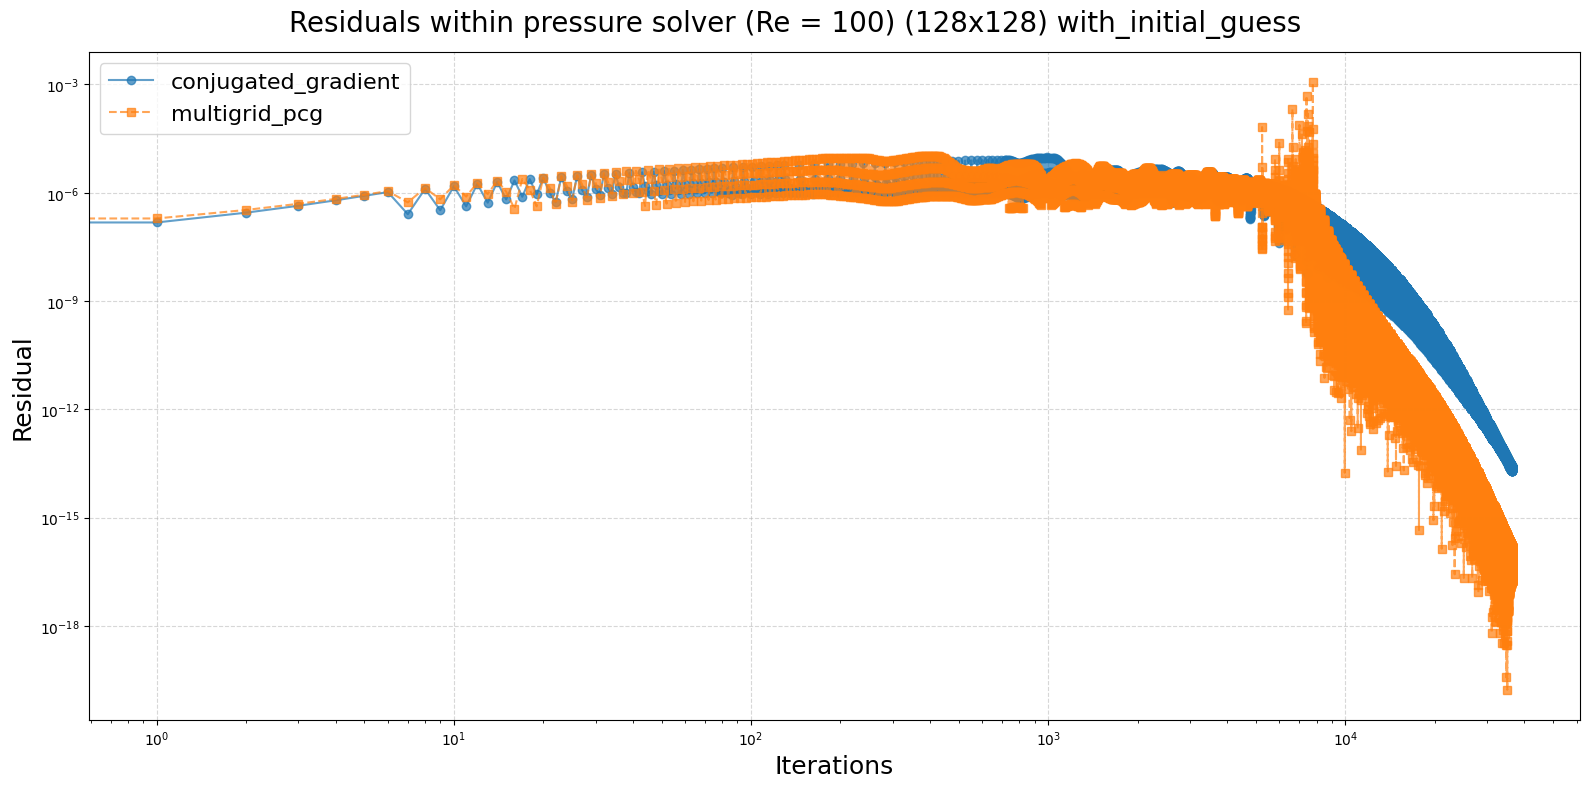

In [47]:
import numpy as np
import matplotlib.pyplot as plt

benchmarks = [
    (
        '128x128', {
            'lid_driven_cavity_2d': [
                'conjugated_gradient',
                'multigrid_pcg'
            ]
        }
    ),
]

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D']

# Create a cycle of distinct colors
colors = ['#1f77b4', '#ff7f0e', '#90ee90', '#d62728']

residuals = ['residuals_with_pressure_solver']

for guess in ['without_initial_guess', 'with_initial_guess']:
    for residual in residuals:
        for RE in [100]:
            fig = plt.figure(figsize=(16, 8))

            if residual == 'residuals_without_pressure_solver':
                fig.suptitle(f'Residuals after pressure solver (Re = {RE})', fontsize=20)
            elif residual == 'residuals_with_pressure_solver':
                fig.suptitle(f'Residuals within pressure solver (Re = {RE}) (128x128) {guess}', fontsize=20)

            for i, (resolution, solvers_dict) in enumerate(benchmarks):
                for problem_name, solvers in solvers_dict.items():
                    for j, solver in enumerate(solvers):
                        data = np.loadtxt(f"{guess}/{solver}/{residual}.dat", ndmin=1)

                        selected_data = data[:36445]

                        plt.plot(
                            np.arange(len(selected_data)),
                            selected_data,
                            label=f'{solver}',
                            linestyle=line_styles[j % len(line_styles)],
                            color=colors[j % len(colors)],
                            marker=markers[j % len(markers)],
                            markersize=6,
                            alpha=0.7,
                        )

                    # set x label
                    plt.xlabel('Iterations', fontsize=18)
                    # set grid
                    plt.grid(True, linestyle='--', alpha=0.5)
                    # set y label
                    plt.ylabel('Residual', fontsize=18)
                    #y log scale
                    plt.yscale('log')
                    plt.xscale('log')
                    # set legend
                    plt.legend(loc='best', fontsize=16)
                    plt.tight_layout()
                    plt.show()


/tmp/ipykernel_3892315/1807666819.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fft_data, hist=False, kde_kws={'label': f'{solver} ({guess})'},ax=axs[guess_index], color=colors[j % len(colors)])
/tmp/ipykernel_3892315/1807666819.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

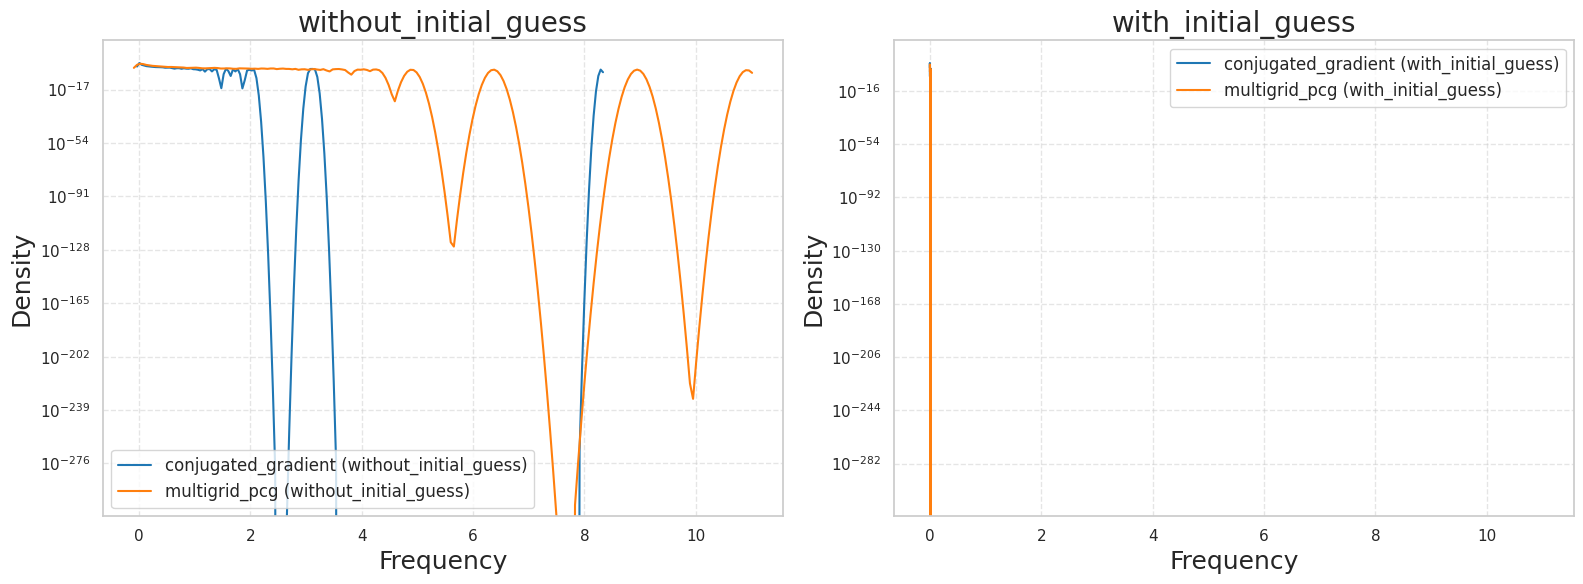

In [90]:
benchmarks = [
    (
        '128x128', {
            'lid_driven_cavity_2d': [
                'conjugated_gradient',
                'multigrid_pcg'
            ]
        }
    ),
]

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D']

# Create a cycle of distinct colors
colors = ['#1f77b4', '#ff7f0e', '#90ee90', '#d62728']

residuals = ['residuals_with_pressure_solver']

sns.set(style="whitegrid")

for RE in [100]:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

    for i, (resolution, solvers_dict) in enumerate(benchmarks):
        for problem_name, solvers in solvers_dict.items():
            for j, solver in enumerate(solvers):
                for guess_index, guess in enumerate(['without_initial_guess', 'with_initial_guess']):
                    data = np.loadtxt(f"{guess}/{solver}/{residuals[0]}.dat", ndmin=1)

                    selected_data = data[:36000]

                    # Calculate FFT for residuals
                    fft_data = np.abs(fft(selected_data))

                    # add title to subplot
                    axs[guess_index].set_title(f'{guess}', fontsize=20)

                    # Create a line plot for the frequency distribution
                    sns.distplot(fft_data, hist=False, kde_kws={'label': f'{solver} ({guess})'},ax=axs[guess_index], color=colors[j % len(colors)])

                    # Set x label for the distribution plot
                    axs[guess_index].set_xlabel('Frequency', fontsize=18)
                    # Set y label for the distribution plot
                    axs[guess_index].set_ylabel('Density', fontsize=18)
                    # Set legend for the distribution plot
                    axs[guess_index].legend(loc='best', fontsize=12)
                    # Set grid for the distribution plot
                    axs[guess_index].grid(True, linestyle='--', alpha=0.5)
                    axs[guess_index].set_yscale('log')

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_3892315/3013465703.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fft_data, hist=False, kde_kws={'label': f'{solver} ({guess})'}, ax=ax, color=colors[j % len(colors)])
/tmp/ipykernel_3892315/3013465703.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ff

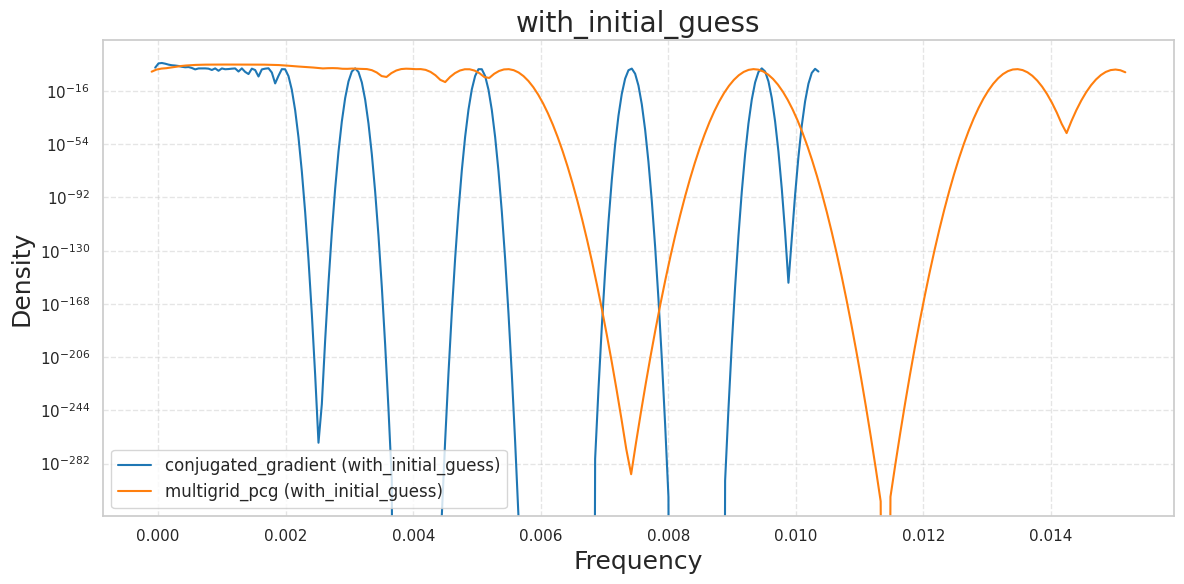

In [96]:
benchmarks = [
    (
        '128x128', {
            'lid_driven_cavity_2d': [
                'conjugated_gradient',
                'multigrid_pcg'
            ]
        }
    ),
]

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D']

# Create a cycle of distinct colors
colors = ['#1f77b4', '#ff7f0e', '#90ee90', '#d62728']

residuals = ['residuals_with_pressure_solver']

sns.set(style="whitegrid")

for RE in [100]:
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, (resolution, solvers_dict) in enumerate(benchmarks):
        for problem_name, solvers in solvers_dict.items():
            for j, solver in enumerate(solvers):
                for guess_index, guess in enumerate(['with_initial_guess']):
                    data = np.loadtxt(f"{guess}/{solver}/{residuals[0]}.dat", ndmin=1)

                    selected_data = data[:36000]

                    # Calculate FFT for residuals
                    fft_data = np.abs(fft(selected_data))

                    # Add title to the plot
                    plt.title(f'{guess}', fontsize=20)

                    # Create a line plot for the frequency distribution
                    sns.distplot(fft_data, hist=False, kde_kws={'label': f'{solver} ({guess})'}, ax=ax, color=colors[j % len(colors)])

                    # Set x label for the distribution plot
                    plt.xlabel('Frequency', fontsize=18)
                    # Set y label for the distribution plot
                    plt.ylabel('Density', fontsize=18)
                    # Set legend for the distribution plot
                    plt.legend(loc='best', fontsize=12)
                    # Set grid for the distribution plot
                    plt.grid(True, linestyle='--', alpha=0.5)
                    plt.yscale('log')

    plt.tight_layout()
    plt.show()
